In [1]:
from miscpy.utils.sympyhelpers import *
init_printing()

This is Example 7.1 from Kasdin & Paley (2011).  The system consists of two point masses $m_P$ and $m_Q$ rigidly attached by a massless link of length $l$ to one another.  Each particle is also attached by a massless rigid link (also of link $l$) to point $O$, forming an equilateral triangle.  The system is allowed to swing freely in-plane, with gravity as the only external force.

In [2]:
# define constants, coordinates, differentiation map, and DCM for I and B frames, defined as in the example.
l,th,thd,thdd,mp,mq,t,TP,TQ,FPQ = symbols('l,theta,thetadot,thetaddot,m_P,m_Q,t,T_P,T_Q,F_{PQ}')
diffmap = {th:thd,thd:thdd}
iWb = Matrix([0,0,thd])
bCi = rotMat(3,(th-pi/2))

In [3]:
# do the kinematics
r_PO = Matrix([sqrt(3)*l/2,-l/2,0])
v_PO = transportEq(r_PO,t,diffmap,iWb)
r_QO = Matrix([sqrt(3)*l/2,l/2,0])
v_QO = transportEq(r_QO,t,diffmap,iWb)
mat2vec(v_PO), mat2vec(v_QO)

In [4]:
# find the net angular momentum about point O
h_O = mp*r_PO.cross(v_PO) + mq*r_QO.cross(v_QO)
mat2vec(h_O,polarframe)

In [5]:
# compute the external moments
M_PO = r_PO.cross(Matrix([-sqrt(3)/2*TP,TP/2,0])+ Matrix([0,FPQ,0])+ bCi*Matrix([0,-mp*g,0]))
M_QO = r_QO.cross(Matrix([-sqrt(3)/2*TQ,-TQ/2,0])+ Matrix([0,-FPQ,0])+ bCi*Matrix([0,-mq*g,0]))
mat2vec(M_PO),mat2vec(M_QO)

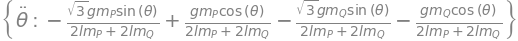

In [6]:
# set up and solve the equations of motion (angular momentum balance about O)
eom = difftotalmat(h_O,t,diffmap) - (M_PO+M_QO)
simplify(solve(eom,thdd))

In [7]:
# finally, solve for the case with equal masses:
simplify(solve(eom.subs(mq,mp),thdd))